In [11]:
cd C:\Users\utkar\Downloads\dataset_1

C:\Users\utkar\Downloads\dataset_1


In [39]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import hog
import matplotlib.pyplot as plt

In [20]:
def load_images_from_folder(folder, img_size=(128, 128)):
    images = []
    labels = []
    class_folders = os.listdir(folder)
    for class_idx, class_folder in enumerate(class_folders):
        class_path = os.path.join(folder, class_folder)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)  # Resize image
                images.append(img)
                labels.append(class_idx)
    return images, labels

In [21]:
dataset_folder = 'dataset_full'
images, labels = load_images_from_folder(dataset_folder)

In [22]:
def extract_hog_features(images):
    hog_features = []
    for image in images:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        features, hog_image = hog(gray_image, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), visualize=True, multichannel=False)
        hog_features.append(features)
    return np.array(hog_features)

In [23]:
features = extract_hog_features(images)

C:\Users\utkar\AppData\Local\Temp\ipykernel_11316\3370822146.py:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(gray_image, pixels_per_cell=(8, 8),


In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
y_pred = clf.predict(X_test)

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7645376549094376
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       112
           1       0.89      0.97      0.93       539
           2       0.51      0.63      0.56        94
           3       0.53      0.40      0.46       107
           4       0.54      0.54      0.54        91
           5       0.76      0.55      0.64       106

    accuracy                           0.76      1049
   macro avg       0.66      0.62      0.63      1049
weighted avg       0.76      0.76      0.76      1049



In [61]:
import pickle

# Save the trained model to a .pkl file
model_filename = 'C:\\Users\\utkar\\Downloads\\dataset_1\\trained_svm_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

# Save the scaler to a .pkl file
scaler_filename = 'C:\\Users\\utkar\\Downloads\\dataset_1\\scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

In [51]:
def predict_new_image(img, model, scaler, img_size=(128, 128)):
    li = ["Building", "Sea", "Mountain", "Street", "Glacier", "Forest"]
    li.sort()
#     print(li)
    img = cv2.resize(img, img_size)  # Resize image to the same size as training images
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features, hog_image = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
    features = scaler.transform([features])
    prediction = model.predict(features)
    result = li[prediction[0]]
    return result

In [52]:
cd C:\Users\utkar\Downloads\dataset_1\Test_images

C:\Users\utkar\Downloads\dataset_1\Test_images


C:\Users\utkar\AppData\Local\Temp\ipykernel_11316\421832595.py:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


Predicted Class: Building


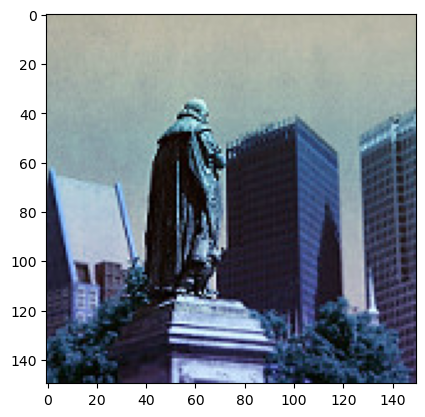

In [53]:
new_image_path = 'C:\\Users\\utkar\\Downloads\\dataset_1\\dataset_full\\Building\\3170.jpg'
img = cv2.imread(new_image_path)
plt.imshow(img)
prediction = predict_new_image(img, clf, scaler)
print("Predicted Class:", prediction)

C:\Users\utkar\AppData\Local\Temp\ipykernel_11316\421832595.py:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


Predicted Class: Sea


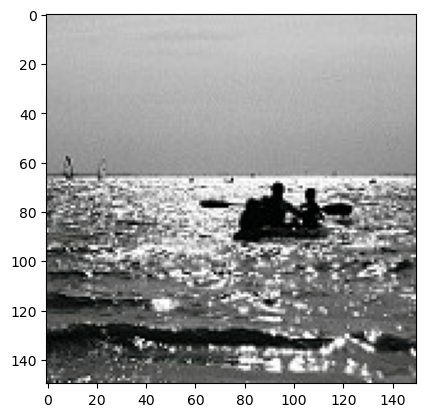

In [54]:
new_image_path = 'C:\\Users\\utkar\\Downloads\\dataset_1\\dataset_full\\Sea\\16013.jpg'
img = cv2.imread(new_image_path)
plt.imshow(img)
prediction = predict_new_image(img, clf, scaler)
print("Predicted Class:", prediction)

C:\Users\utkar\AppData\Local\Temp\ipykernel_11316\421832595.py:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


Predicted Class: Mountain


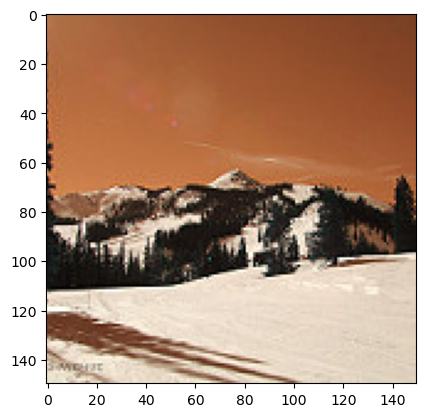

In [55]:
new_image_path = 'C:\\Users\\utkar\\Downloads\\dataset_1\\dataset_full\\Mountains\\3401.jpg'
img = cv2.imread(new_image_path)
plt.imshow(img)
prediction = predict_new_image(img, clf, scaler)
print("Predicted Class:", prediction)

C:\Users\utkar\AppData\Local\Temp\ipykernel_11316\421832595.py:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


Predicted Class: Street


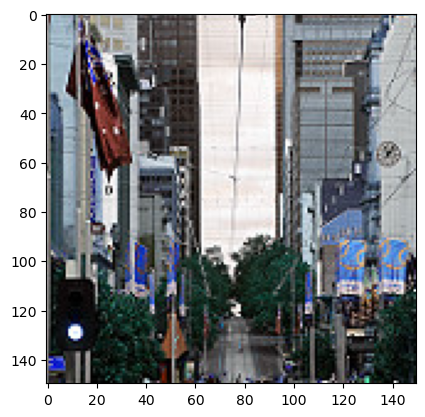

In [56]:
new_image_path = 'C:\\Users\\utkar\\Downloads\\dataset_1\\dataset_full\\Streets\\186.jpg'
img = cv2.imread(new_image_path)
plt.imshow(img)
prediction = predict_new_image(img, clf, scaler)
print("Predicted Class:", prediction)

C:\Users\utkar\AppData\Local\Temp\ipykernel_11316\421832595.py:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


Predicted Class: Glacier


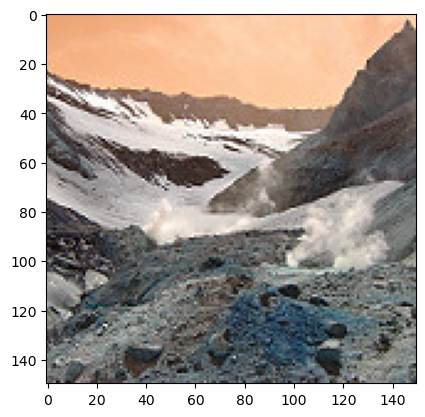

In [57]:
new_image_path = 'C:\\Users\\utkar\\Downloads\\dataset_1\\dataset_full\\Glacier\\3602.jpg'
img = cv2.imread(new_image_path)
plt.imshow(img)
prediction = predict_new_image(img, clf, scaler)
print("Predicted Class:", prediction)

C:\Users\utkar\AppData\Local\Temp\ipykernel_11316\421832595.py:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


Predicted Class: Forest


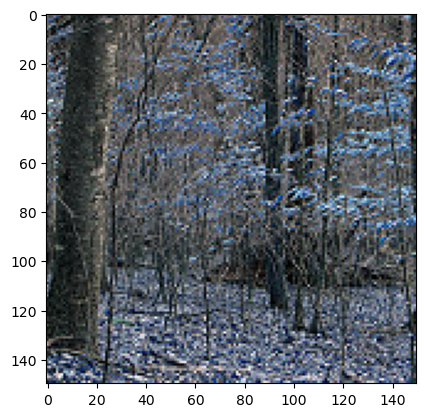

In [58]:
new_image_path = 'C:\\Users\\utkar\\Downloads\\dataset_1\\dataset_full\\Forest\\231.jpg'
img = cv2.imread(new_image_path)
plt.imshow(img)
prediction = predict_new_image(img, clf, scaler)
print("Predicted Class:", prediction)

In [62]:
!git clone https://github.com/YashAmin0/Bombay-Software-Assignment.git

'git' is not recognized as an internal or external command,
operable program or batch file.
